PROYEK STKI : REKOMENDASI RESEP BERDASARKAN MASUKAN PENGGUNA MENGGUNAKAN TF-IDF DAN ALGORITMA COSINE SIMMILARATY

Nama: Nurul Baroroh
NIM : A11.2022.14802

# mount drive

In [117]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# import library yang digunakan

In [118]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import glob #to get a list of files matching a pattern


# Tentukan folder tempat file CSV berada
folder_path = '/content/drive/MyDrive/resep'  # path resep yang digunakan

# Ambil semua file CSV dalam folder
all_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.csv')]

# Baca semua file ke dalam list
df_list = [pd.read_csv(file) for file in all_files]

# Gabungkan semua DataFrame dalam df_list menjadi satu DataFrame
df = pd.concat(df_list, ignore_index=True)

df

,Title,Ingredients,Steps,Loves,URL
0,Gurame Saus Padang,Bahan utama:--1 ekor gurame--Bumbu untuk saus:...,Cuci bersih ikan gurame yang akan dimasak. Set...,2,/id/resep/4474009-gurame-saus-padang
1,Ikan Kembung Bakar Teflon,"1/2 kg ikan kembung sate, bersihkan--1 buah je...","Kucuri ikan dengan jeruk, diamkan 5 menit--Lum...",2,/id/resep/4474225-ikan-kembung-bakar-teflon
2,Mujaer asam pedas manis,1/2 kg ikan mujaer (stok gurame habis)--2 buah...,Bersihkan ikan sampai benar-benar bersih. Kera...,1,/id/resep/4473689-mujaer-asam-pedas-manis
3,Gurame Asam manis,1/2 kg ikan gurame--2 buah wortel (potong sepe...,Uleg kunir sama garam kasih air lalu guraminya...,5,/id/resep/4473428-gurame-asam-manis
4,Asam padeh ikan tuna,1/2 kg ikan tuna--6 siung bawang merah--4 siun...,"Haluskan bumbu (cabai merah, kemiri, bawang, k...",7,/id/resep/4473138-asam-padeh-ikan-tuna
...,...,...,...,...,...
15636,Ayam siram tahu,Bahan ayam tepung :--250 gr dada ayam filet--1...,Buat adonan tepung dg mencampurkan kedalam koc...,2,/id/resep/4038046-ayam-siram-tahu
15637,Tumis Tauge Tahu,"2 buah tahu (potong dadu, goreng stengah maten...","Panaskan minyak, tumis bawang putih dan cabe m...",4,/id/resep/4038315-tumis-tauge-tahu
15638,Tahu KW DEBM,4 butir telur--1 santan segitiga--1 bks agar2 ...,Campur semua bahan--Blender hingga halus--Sete...,12,/id/resep/4037785-tahu-kw-debm
15639,Tahu goreng krispi simple,4 buah tahu putih (goreng terlebih dahulu sete...,Iris menjadi 2 bagian tahu putih kemudian gore...,5,/id/resep/4037870-tahu-goreng-krispi-simple


# EDA

In [119]:
# Tampilkan nama-nama kolom
print(df.columns)

# Tampilkan informasi umum tentang dataset
print(df.info())

# Tampilkan statistik deskriptif (opsional)
print(df.describe())

Index(['Title', 'Ingredients', 'Steps', 'Loves', 'URL'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15641 entries, 0 to 15640
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        15641 non-null  object
 1   Ingredients  15593 non-null  object
 2   Steps        15595 non-null  object
 3   Loves        15641 non-null  int64 
 4   URL          15641 non-null  object
dtypes: int64(1), object(4)
memory usage: 611.1+ KB
None
              Loves
count  15641.000000
mean      11.745796
std       21.526043
min        0.000000
25%        3.000000
50%        6.000000
75%       11.000000
max      939.000000


In [120]:
print(df.columns)  # Menampilkan nama kolom

Index(['Title', 'Ingredients', 'Steps', 'Loves', 'URL'], dtype='object')


In [121]:
df.shape

(15641, 5)

# Menampilkan Missing Values

In [122]:
print(df.isnull().sum())  # Menampilkan jumlah nilai kosong di setiap kolom

Title           0
Ingredients    48
Steps          46
Loves           0
URL             0
dtype: int64


In [123]:
df[df['Ingredients'].isnull()]

,Title,Ingredients,Steps,Loves,URL
2187,[Notitle],NaN,NaN,0,/id/resep/4459283-ayam-bakar
2190,[Notitle],NaN,NaN,0,/id/resep/4458951-sate-ayam-maknyusss
2230,[Notitle],NaN,NaN,0,/id/resep/4454787-garang-asam-ayam-kampung
2234,[Notitle],NaN,NaN,0,/id/resep/4454903-ayam-kremes
2396,[Notitle],NaN,NaN,0,/id/resep/4444134-ayam-balado-simple
2453,[Notitle],NaN,NaN,0,/id/resep/4442538-perkedel-ayam
2455,[Notitle],NaN,NaN,0,/id/resep/4442319-chicken-wings-saos-mentega
2456,[Notitle],NaN,NaN,0,/id/resep/4442267-ayam-sambal-ijo
2767,[Notitle],NaN,NaN,0,/id/resep/4410020-ayam-terriyaki
2781,[Notitle],NaN,NaN,0,/id/resep/4409498-mie-ayam-homemade-ala-mama-n...


In [124]:
df[df['Steps'].isnull()]

,Title,Ingredients,Steps,Loves,URL
2187,[Notitle],NaN,NaN,0,/id/resep/4459283-ayam-bakar
2190,[Notitle],NaN,NaN,0,/id/resep/4458951-sate-ayam-maknyusss
2230,[Notitle],NaN,NaN,0,/id/resep/4454787-garang-asam-ayam-kampung
2234,[Notitle],NaN,NaN,0,/id/resep/4454903-ayam-kremes
2396,[Notitle],NaN,NaN,0,/id/resep/4444134-ayam-balado-simple
2453,[Notitle],NaN,NaN,0,/id/resep/4442538-perkedel-ayam
2455,[Notitle],NaN,NaN,0,/id/resep/4442319-chicken-wings-saos-mentega
2456,[Notitle],NaN,NaN,0,/id/resep/4442267-ayam-sambal-ijo
2767,[Notitle],NaN,NaN,0,/id/resep/4410020-ayam-terriyaki
2781,[Notitle],NaN,NaN,0,/id/resep/4409498-mie-ayam-homemade-ala-mama-n...


In [125]:
df[df['Title'].str.contains('Notitle', case=True)]

,Title,Ingredients,Steps,Loves,URL
2187,[Notitle],NaN,NaN,0,/id/resep/4459283-ayam-bakar
2190,[Notitle],NaN,NaN,0,/id/resep/4458951-sate-ayam-maknyusss
2230,[Notitle],NaN,NaN,0,/id/resep/4454787-garang-asam-ayam-kampung
2234,[Notitle],NaN,NaN,0,/id/resep/4454903-ayam-kremes
2396,[Notitle],NaN,NaN,0,/id/resep/4444134-ayam-balado-simple
2453,[Notitle],NaN,NaN,0,/id/resep/4442538-perkedel-ayam
2455,[Notitle],NaN,NaN,0,/id/resep/4442319-chicken-wings-saos-mentega
2456,[Notitle],NaN,NaN,0,/id/resep/4442267-ayam-sambal-ijo
2767,[Notitle],NaN,NaN,0,/id/resep/4410020-ayam-terriyaki
2781,[Notitle],NaN,NaN,0,/id/resep/4409498-mie-ayam-homemade-ala-mama-n...


In [126]:
df['Ingredients'].fillna('NoIngrediens', inplace=True)

<ipython-input-126-91053ea49818>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ingredients'].fillna('NoIngrediens', inplace=True)


Menghilangkan nilai kosong (Missing Value)

In [127]:
df.isnull().sum()

,0
Title,0
Ingredients,0
Steps,46
Loves,0
URL,0


In [128]:
df['Steps'].fillna('NoSteps', inplace=True)

<ipython-input-128-4b4afc3392eb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Steps'].fillna('NoSteps', inplace=True)


In [129]:
df.isnull().sum()

,0
Title,0
Ingredients,0
Steps,0
Loves,0
URL,0


pemroresan data

In [130]:
df['numberof_Ingredients'] = df['Ingredients'].str.count('--')

In [131]:
df['numberof_Steps'] = df['Steps'].str.count('--')

In [132]:
df.head(10)

,Title,Ingredients,Steps,Loves,URL,numberof_Ingredients,numberof_Steps
0,Gurame Saus Padang,Bahan utama:--1 ekor gurame--Bumbu untuk saus:...,Cuci bersih ikan gurame yang akan dimasak. Set...,2,/id/resep/4474009-gurame-saus-padang,25,8
1,Ikan Kembung Bakar Teflon,"1/2 kg ikan kembung sate, bersihkan--1 buah je...","Kucuri ikan dengan jeruk, diamkan 5 menit--Lum...",2,/id/resep/4474225-ikan-kembung-bakar-teflon,5,5
2,Mujaer asam pedas manis,1/2 kg ikan mujaer (stok gurame habis)--2 buah...,Bersihkan ikan sampai benar-benar bersih. Kera...,1,/id/resep/4473689-mujaer-asam-pedas-manis,13,7
3,Gurame Asam manis,1/2 kg ikan gurame--2 buah wortel (potong sepe...,Uleg kunir sama garam kasih air lalu guraminya...,5,/id/resep/4473428-gurame-asam-manis,14,3
4,Asam padeh ikan tuna,1/2 kg ikan tuna--6 siung bawang merah--4 siun...,"Haluskan bumbu (cabai merah, kemiri, bawang, k...",7,/id/resep/4473138-asam-padeh-ikan-tuna,16,9
5,Avocado Tuna Salad,1 kaleng Tuna Chunks--2 butir telur rebus--3 b...,"Campur semuanya dalam baskom, kecuali biji zai...",0,/id/resep/4473223-avocado-tuna-salad,9,2
6,Lele Asam Manis,1/2 kg Lele Segar--180 ml air--3 sdm kecap man...,"Cuci bersihbikan, lalu goreng ikan lele agak m...",0,/id/resep/4473217-lele-asam-manis,13,6
7,Pempek kulit ikan tenggiri,500 gr kulit ikan tenggiri halu--200 cc air ma...,Aduk ikan tambahkan air sedikit demi sedikit b...,6,/id/resep/4472657-pempek-kulit-ikan-tenggiri,12,9
8,Tumis Tongkol Petai,2 bungkus tongkol--2 cabe gendot--2 papan peta...,"Cuci bersih ikan tongkol, goreng sebentar--Iri...",6,/id/resep/4472513-tumis-tongkol-petai,10,3
9,Ikan Patin pedas manis,500 gr ikan patin--5 siung bawang merah iris t...,"Ikan patin yang sudah dicuci bersih, dilumuri ...",0,/id/resep/4472909-ikan-patin-pedas-manis,10,5


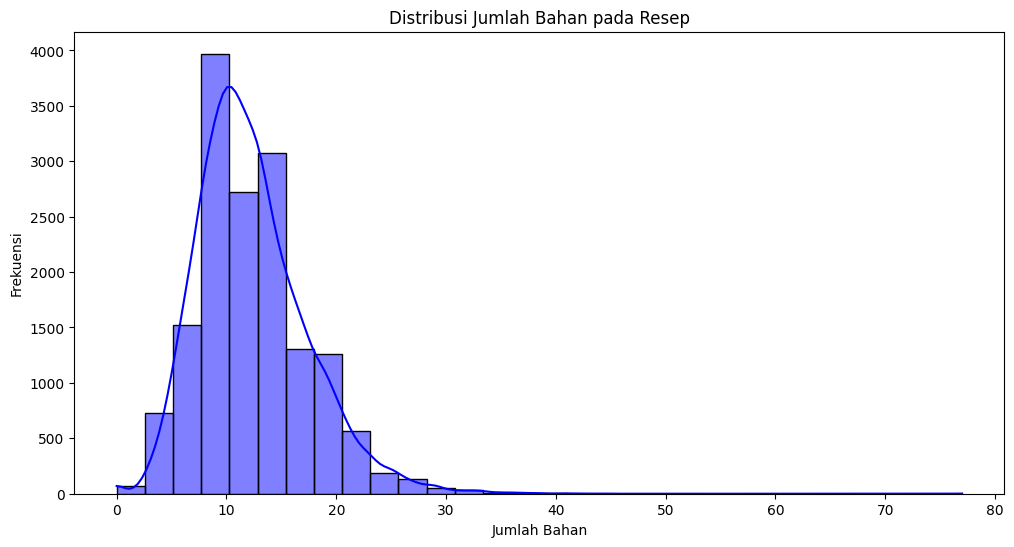

In [133]:
# Distribusi jumlah bahan dan langkah dalam resep
plt.figure(figsize=(12, 6))
sns.histplot(df['numberof_Ingredients'], bins=30, kde=True, color='blue')
plt.title('Distribusi Jumlah Bahan pada Resep')
plt.xlabel('Jumlah Bahan')
plt.ylabel('Frekuensi')
plt.show()

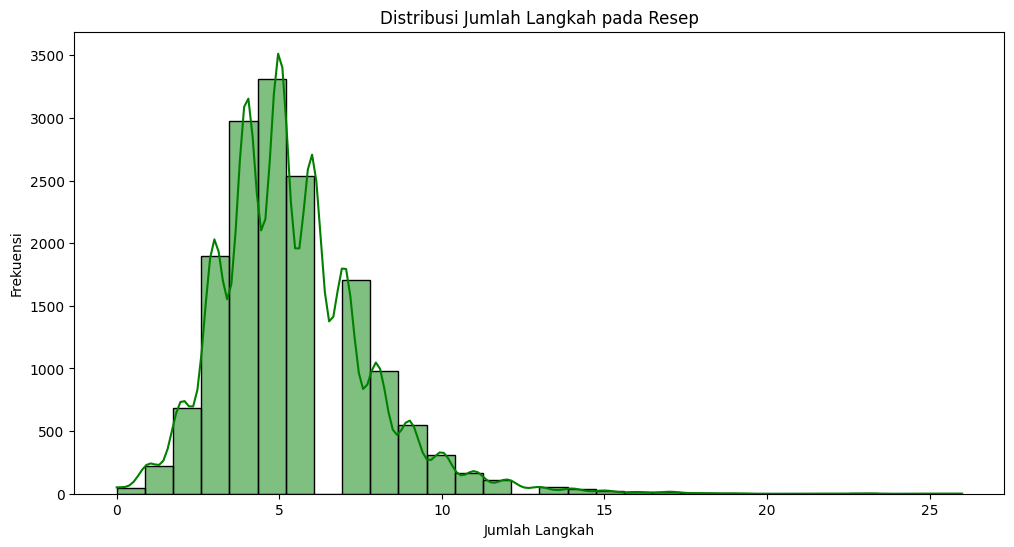

In [134]:
plt.figure(figsize=(12, 6))
sns.histplot(df['numberof_Steps'], bins=30, kde=True, color='green')
plt.title('Distribusi Jumlah Langkah pada Resep')
plt.xlabel('Jumlah Langkah')
plt.ylabel('Frekuensi')
plt.show()

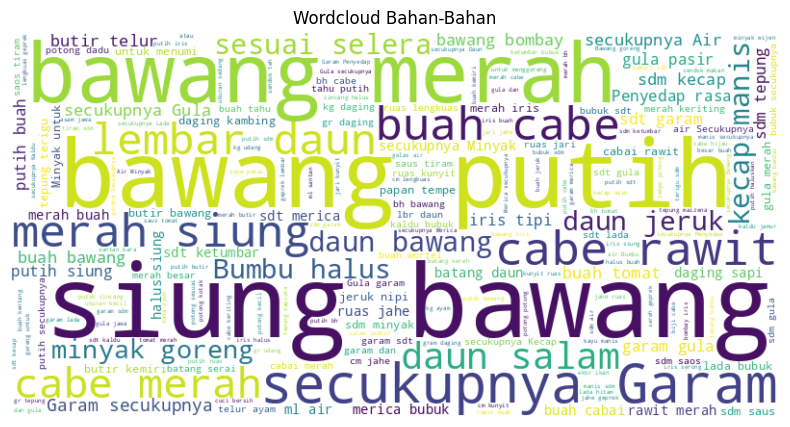

In [135]:
# Membuat wordcloud untuk bahan-bahan
ingredients_text = ' '.join(df['Ingredients'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ingredients_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wordcloud Bahan-Bahan')
plt.show()

In [136]:
# Membersihkan data tambahan (opsional)
df['Ingredients'] = df['Ingredients'].str.lower().str.replace(r'[^\w\s]', '', regex=True)
df['Steps'] = df['Steps'].str.lower().str.replace(r'[^\w\s]', '', regex=True)

In [137]:
# Sistem rekomendasi berbasis bahan (content-based filtering)
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

Penggabungan bahan menjadi satu string

In [138]:
# Menggabungkan semua bahan menjadi satu string
df['ingredients_joined'] = df['Ingredients'].str.replace('--', ' ')

Penerapan TF-IDF

In [139]:
# Menggunakan TF-IDF untuk representasi teks
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['ingredients_joined'])

Penerapan Cosine Simmilarity

In [140]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np

def recommend_recipes_with_exploration(input_ingredients, df, tfidf_matrix, top_n=3, exploration_factor=0.5):
    """
    Merekomendasikan resep berbasis bahan dengan elemen eksplorasi.

    Args:
        input_ingredients (list): Daftar bahan input pengguna.
        df (pd.DataFrame): Dataset resep.
        tfidf_matrix (scipy.sparse.csr_matrix): Matriks TF-IDF.
        top_n (int): Jumlah rekomendasi teratas.
        exploration_factor (float): Proporsi rekomendasi eksplorasi (0 hingga 1).

    Returns:
        str: Rekomendasi resep dalam format yang terformat rapi.
    """
    # Gabungkan input bahan menjadi satu string
    query = ' '.join(input_ingredients).strip().lower()
    if not query:
        raise ValueError("Input bahan tidak boleh kosong.")

    # Transformasikan query ke dalam vektor TF-IDF
    query_vector = tfidf.transform([query])

    # Hitung kesamaan cosine antara query dan dataset
    cosine_similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()

    # Ambil indeks dari top_n skor tertinggi
    top_indices = np.argsort(-cosine_similarities)[:top_n]

    # Tambahkan elemen eksplorasi
    if 0 < exploration_factor < 1:
        num_exploration = int(top_n * exploration_factor)
        exploration_indices = np.random.choice(range(len(df)), size=num_exploration, replace=False)
        top_indices = np.unique(np.concatenate([top_indices, exploration_indices]))

    # Ambil rekomendasi dari indeks yang dipilih
    recommendations = df.iloc[top_indices][['Title', 'Ingredients', 'Steps']]

    # Format hasil rekomendasi
    output = []
    for _, row in recommendations.iterrows():
        # Format langkah-langkah resep
        steps = [step.strip() for step in row['Steps'].split('--') if step.strip()]
        numbered_steps = "\n".join([f"{i + 1}. {step}" for i, step in enumerate(steps)])

        # Format bahan-bahan
        ingredients = [ingredient.strip() for ingredient in row['Ingredients'].split('--') if ingredient.strip()]
        formatted_ingredients = "\n".join([f"• {ingredient}" for ingredient in ingredients])

        # Tambahkan ke output
        output.append(f"**{row['Title']}**\n\n"
                      f"**Bahan:**\n{formatted_ingredients}\n\n"
                      f"**Langkah:**\n{numbered_steps}\n"
                      "-----------------------------------------\n")

    return "\n".join(output)

Pengujian Sistem

In [141]:
# Contoh penggunaan
input_ingredients = ['ayam', 'bawang', 'garam']
recommendations = recommend_recipes_with_exploration(input_ingredients, df, tfidf_matrix, top_n=3, exploration_factor=0.3)

# Tampilkan hasil rekomendasi
print(recommendations)

**Sambel korek ayam goreng**

**Bahan:**
• 4 biji ayam gorengsambel20 biji cabe rawit merah3 siung bawang putihsecukupnya garam n penyedapminyak goreng panas bekas goreng ayam

**Langkah:**
1. uleg semua bahan lalu beri garam dan penyedappanaskan minyak lalu siram ke sambel lalu aduk2koreksi rasa n hidangkan dengan ayam gorengsimpel bgt
-----------------------------------------

**Ayam Goreng minim bumbu**

**Bahan:**
• 14 daging ayam ayam yg ukurannya sedang2 siung bawang putihsecukupnya mericasecukupnya garam

**Langkah:**
1. haluskan bawang putih merica dan garambalur rata ayam yg telah dicuci sebelumnya dgn bumbu halus tadi simpan dalam kulkas kurleb 23 jam supaya bumbu meresapsajikankeluarkan dari kulkas tunggu ayam hingga suhu ruangan goreng dgn api kecil hingga ayam matang luar dalam
-----------------------------------------

**Telur tim ayam favorit**

**Bahan:**
• 200 gr daging ayam cincang  giling7 butir telur ayam kampung78 sdm susu pasteur diamond1 sdt garam tergantung sele

EVALUASI

In [142]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

def recommend_recipes(input_ingredients, df, tfidf_matrix, vectorizer, top_n=5):
    """
    Fungsi rekomendasi resep berdasarkan bahan yang diberikan.

    Args:
        input_ingredients (list): Daftar bahan input pengguna.
        df (pd.DataFrame): Dataset resep.
        tfidf_matrix (scipy.sparse.csr_matrix): Matriks TF-IDF.
        vectorizer (TfidfVectorizer): Objek vectorizer untuk mentransformasi input pengguna.
        top_n (int): Jumlah rekomendasi teratas.

    Returns:
        list: Indeks resep yang direkomendasikan.
    """
    query = ' '.join(input_ingredients).strip().lower()
    if not query:
        raise ValueError("Input bahan tidak boleh kosong.")

    query_vector = vectorizer.transform([query])  # Menggunakan vectorizer untuk transformasi
    cosine_similarities = cosine_similarity(query_vector, tfidf_matrix).flatten()

    # Ambil indeks top_n resep dengan skor tertinggi
    top_indices = np.argsort(-cosine_similarities)[:top_n]

    return top_indices

# Fungsi evaluasi
def evaluate_recommendation(df, tfidf_matrix, vectorizer, n_samples=100, top_n=5):
    total_coverage = set()
    diversity_scores = []

    for _ in range(n_samples):
        # Randomly sample an item as input
        random_idx = df.sample(1).index[0]
        input_ingredients = df.loc[random_idx, 'ingredients_joined'].split()

        # Get recommendations
        indices = recommend_recipes(input_ingredients, df, tfidf_matrix, vectorizer, top_n=top_n)

        # Coverage: Add recommended indices to the total set
        total_coverage.update(indices)

        # Diversity: Compute pairwise cosine similarity among recommended items
        recommended_vectors = tfidf_matrix[indices].toarray()
        if len(recommended_vectors) > 1:  # Pastikan ada lebih dari satu rekomendasi
            pairwise_sim = cosine_similarity(recommended_vectors)
            diversity = 1 - pairwise_sim[np.triu_indices_from(pairwise_sim, k=1)].mean()
        else:
            diversity = 0  # Tidak ada cukup rekomendasi untuk menghitung keberagaman
        diversity_scores.append(diversity)

    # Compute metrics
    coverage = len(total_coverage) / len(df)
    avg_diversity = sum(diversity_scores) / len(diversity_scores)

    return coverage, avg_diversity

# Contoh penggunaan
df = pd.DataFrame({
    'Title': ['Resep 1', 'Resep 2', 'Resep 3'],
    'ingredients_joined': ['ayam bawang garam', 'ikan bawang merica', 'ayam cabai garam']
})

# Membuat objek vectorizer dan matriks TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['ingredients_joined'])

# Evaluasi rekomendasi
coverage, avg_diversity = evaluate_recommendation(df, tfidf_matrix, vectorizer, n_samples=100, top_n=3)

print(f"Coverage: {coverage:.2f}")
print(f"Average Diversity: {avg_diversity:.2f}")

Coverage: 1.00
Average Diversity: 0.71


In [143]:
import joblib

# Menyimpan model TF-IDF
joblib.dump(tfidf, 'vectorizer.pkl')

# Jika recommended_recipes adalah fungsi, Anda bisa menyimpan komponen yang diperlukan
# seperti dataset atau model lain yang digunakan oleh fungsi
# Misalnya, menyimpan DataFrame yang digunakan oleh fungsi rekomendasi
joblib.dump(df, 'recipe_dataset.pkl')

['recipe_dataset.pkl']